# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from config import api
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [8]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
#* Include a print log of each city as it'sbeing processed (with the city number and city name).
url = "http://api.openweathermap.org/data/2.5/weather"
query = "Nashville"
url_params = {
    "api" : api,
    "q" : query,
    'page': 2
}
city_name = []
Lat = []
Long = []
MaxTemp = []
Humidity = []
Cloundiness = []
WindSpeed = []
Date = []
#enum
for city in cities:
   
    try: 
        # Build partial query URL
        query_url = f"{url}?units=Imperial&appid={api}&q={city}"
        #query_url
    

    
        print("City : ",city)
        city_weather = requests.get(query_url).json()
    
    
    
        print(city_weather)
        city_name.append(city_weather['name'])
        Lat.append(city_weather['coord']['lat'])
        Long.append(city_weather['coord']['lon'])
        MaxTemp.append(city_weather['main']['temp_max'])
        Humidity.append(city_weather['main']['humidity'])
        Cloundiness.append(city_weather['clouds']['all'])
        WindSpeed.append(city_weather['wind']['speed'])
      
    except: 
        print("City not found")
    
    time.sleep(1)
print(city_name) 
    

City :  vardo
{'coord': {'lon': 31.11, 'lat': 70.37}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 37.4, 'feels_like': 23.11, 'temp_min': 37.4, 'temp_max': 37.4, 'pressure': 999, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 220}, 'clouds': {'all': 75}, 'dt': 1603733387, 'sys': {'type': 1, 'id': 1666, 'country': 'NO', 'sunrise': 1603692083, 'sunset': 1603718242}, 'timezone': 3600, 'id': 777019, 'name': 'Vardø', 'cod': 200}
City :  ushuaia
{'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 59, 'feels_like': 44.8, 'temp_min': 59, 'temp_max': 59, 'pressure': 983, 'humidity': 33}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 320}, 'clouds': {'all': 40}, 'dt': 1603733669, 'sys': {'type': 1, 'id': 8303, 'country': 'AR', 'sunrise': 1603702588, 'sunset': 16037554

City :  aksha
{'coord': {'lon': 113.29, 'lat': 50.28}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 23.45, 'feels_like': 13.17, 'temp_min': 23.45, 'temp_max': 23.45, 'pressure': 1025, 'humidity': 74, 'sea_level': 1025, 'grnd_level': 934}, 'visibility': 10000, 'wind': {'speed': 8.81, 'deg': 292}, 'clouds': {'all': 24}, 'dt': 1603733686, 'sys': {'country': 'RU', 'sunrise': 1603753721, 'sunset': 1603789949}, 'timezone': 32400, 'id': 2028028, 'name': 'Aksha', 'cod': 200}
City :  longyearbyen
{'coord': {'lon': 15.64, 'lat': 78.22}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.2, 'feels_like': 9.41, 'temp_min': 21.2, 'temp_max': 21.2, 'pressure': 1004, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 130}, 'clouds': {'all': 75}, 'dt': 1603733687, 'sys': {'type': 1, 'id': 1663, 'country': 'SJ', 'sunrise': 160

City :  bredasdorp
{'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 64.4, 'feels_like': 58.15, 'temp_min': 64.4, 'temp_max': 64.4, 'pressure': 1014, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 140}, 'clouds': {'all': 100}, 'dt': 1603733647, 'sys': {'type': 1, 'id': 1966, 'country': 'ZA', 'sunrise': 1603683849, 'sunset': 1603731789}, 'timezone': 7200, 'id': 1015776, 'name': 'Bredasdorp', 'cod': 200}
City :  busselton
{'coord': {'lon': 115.33, 'lat': -33.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.09, 'feels_like': 51.62, 'temp_min': 54, 'temp_max': 57, 'pressure': 1005, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 297}, 'clouds': {'all': 6}, 'dt': 1603733708, 'sys': {'type': 3, 'id': 2011706, 'country': 'AU', 'sunrise': 1603747405, 

City :  rawson
{'coord': {'lon': -65.1, 'lat': -43.3}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 72.7, 'feels_like': 62.06, 'temp_min': 72.7, 'temp_max': 72.7, 'pressure': 1004, 'humidity': 25, 'sea_level': 1004, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 13.33, 'deg': 286}, 'clouds': {'all': 42}, 'dt': 1603733715, 'sys': {'country': 'AR', 'sunrise': 1603703432, 'sunset': 1603753071}, 'timezone': -10800, 'id': 3839307, 'name': 'Rawson', 'cod': 200}
City :  kahului
{'coord': {'lon': -156.47, 'lat': 20.89}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 73.22, 'feels_like': 75.54, 'temp_min': 72, 'temp_max': 73.99, 'pressure': 1015, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 140}, 'clouds': {'all': 20}, 'dt': 1603733728, 'sys': {'type': 1, 'id': 7879, 'country': 'US', 'sunrise': 16

City :  tutoia
{'coord': {'lon': -42.27, 'lat': -2.76}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 84.79, 'feels_like': 85.69, 'temp_min': 84.79, 'temp_max': 84.79, 'pressure': 1006, 'humidity': 67, 'sea_level': 1006, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 14.38, 'deg': 48}, 'clouds': {'all': 19}, 'dt': 1603733659, 'sys': {'country': 'BR', 'sunrise': 1603700819, 'sunset': 1603744726}, 'timezone': -10800, 'id': 3385899, 'name': 'Tutóia', 'cod': 200}
City :  lavrentiya
{'coord': {'lon': -171, 'lat': 65.58}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 30.04, 'feels_like': 23.32, 'temp_min': 30.04, 'temp_max': 30.04, 'pressure': 1012, 'humidity': 91, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 4.54, 'deg': 316}, 'clouds': {'all': 31}, 'dt': 1603733747, 'sys': {'country

City :  puerto colombia
{'coord': {'lon': -74.95, 'lat': 10.99}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 87.8, 'feels_like': 96.57, 'temp_min': 87.8, 'temp_max': 87.8, 'pressure': 1010, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 220}, 'clouds': {'all': 40}, 'dt': 1603733764, 'sys': {'type': 1, 'id': 8584, 'country': 'CO', 'sunrise': 1603709407, 'sunset': 1603751823}, 'timezone': -18000, 'id': 3671497, 'name': 'Puerto Colombia', 'cod': 200}
City :  yumen
{'coord': {'lon': 97.2, 'lat': 40.28}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 31.86, 'feels_like': 25.25, 'temp_min': 31.86, 'temp_max': 31.86, 'pressure': 1026, 'humidity': 74, 'sea_level': 1026, 'grnd_level': 857}, 'visibility': 10000, 'wind': {'speed': 3.67, 'deg': 89}, 'clouds': {'all': 100}, 'dt': 1603733765, 'sys': {'country': 

City :  alagoinha
{'coord': {'lon': -35.55, 'lat': -6.95}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 87.94, 'temp_min': 86, 'temp_max': 86, 'pressure': 1010, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 40}, 'clouds': {'all': 40}, 'dt': 1603733781, 'sys': {'type': 1, 'id': 8391, 'country': 'BR', 'sunrise': 1603698978, 'sunset': 1603743341}, 'timezone': -10800, 'id': 3408094, 'name': 'Alagoinha', 'cod': 200}
City :  kutum
{'coord': {'lon': 24.67, 'lat': 14.2}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.7, 'feels_like': 66.72, 'temp_min': 77.7, 'temp_max': 77.7, 'pressure': 1010, 'humidity': 19, 'sea_level': 1010, 'grnd_level': 886}, 'visibility': 10000, 'wind': {'speed': 13.2, 'deg': 13}, 'clouds': {'all': 85}, 'dt': 1603733782, 'sys': {'country': 'SD', 'sunrise': 1603

City :  ballarat
{'coord': {'lon': 143.85, 'lat': -37.57}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 44.44, 'feels_like': 37.76, 'temp_min': 43, 'temp_max': 46, 'pressure': 1025, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 8.3, 'deg': 116}, 'clouds': {'all': 86}, 'dt': 1603733799, 'sys': {'type': 3, 'id': 2003214, 'country': 'AU', 'sunrise': 1603740224, 'sunset': 1603788779}, 'timezone': 39600, 'id': 2177091, 'name': 'Ballarat', 'cod': 200}
City :  doha
{'coord': {'lon': 51.53, 'lat': 25.29}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 89.06, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1014, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 30}, 'clouds': {'all': 0}, 'dt': 1603733597, 'sys': {'type': 1, 'id': 7614, 'country': 'QA', 'sunrise': 1603679884, 'sunset': 1603

City :  maceio
{'coord': {'lon': -35.74, 'lat': -9.67}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 87.8, 'feels_like': 91.29, 'temp_min': 87.8, 'temp_max': 87.8, 'pressure': 1008, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 70}, 'clouds': {'all': 20}, 'dt': 1603733546, 'sys': {'type': 1, 'id': 8413, 'country': 'BR', 'sunrise': 1603698873, 'sunset': 1603743538}, 'timezone': -10800, 'id': 3395981, 'name': 'Maceió', 'cod': 200}
City :  pyaozerskiy
{'coord': {'lon': 31.17, 'lat': 65.83}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 46.13, 'feels_like': 35.83, 'temp_min': 46.13, 'temp_max': 46.13, 'pressure': 1004, 'humidity': 90, 'sea_level': 1004, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 15.55, 'deg': 208}, 'clouds': {'all': 100}, 'dt': 1603733817, 'sys': {'country': 'RU', 'sunrise

City :  thunder bay
{'coord': {'lon': -89.32, 'lat': 48.4}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.64, 'feels_like': 19.06, 'temp_min': 28.99, 'temp_max': 30.2, 'pressure': 1025, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 300}, 'clouds': {'all': 75}, 'dt': 1603733726, 'sys': {'type': 1, 'id': 906, 'country': 'CA', 'sunrise': 1603715670, 'sunset': 1603752458}, 'timezone': -14400, 'id': 6166142, 'name': 'Thunder Bay', 'cod': 200}
City :  kudahuvadhoo
{'coord': {'lon': 72.89, 'lat': 2.67}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 82.81, 'feels_like': 88.48, 'temp_min': 82.81, 'temp_max': 82.81, 'pressure': 1011, 'humidity': 74, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 297}, 'clouds': {'all': 48}, 'dt': 1603733834, 'sys': {'country': '

City :  lakes entrance
{'coord': {'lon': 147.98, 'lat': -37.88}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50, 'feels_like': 43.7, 'temp_min': 50, 'temp_max': 50, 'pressure': 1024, 'humidity': 96}, 'visibility': 10000, 'wind': {'speed': 10.83, 'deg': 114}, 'clouds': {'all': 87}, 'dt': 1603733850, 'sys': {'type': 3, 'id': 2011895, 'country': 'AU', 'sunrise': 1603739205, 'sunset': 1603787816}, 'timezone': 39600, 'id': 2160735, 'name': 'Lakes Entrance', 'cod': 200}
City :  hobart
{'coord': {'lon': 147.33, 'lat': -42.88}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 49.39, 'feels_like': 43.25, 'temp_min': 48, 'temp_max': 50, 'pressure': 1032, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 120}, 'clouds': {'all': 90}, 'dt': 1603733818, 'sys': {'type': 1, 'id': 9545, 'country': 'AU', 'sunrise': 16037

City :  namatanai
{'coord': {'lon': 152.43, 'lat': -3.67}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.81, 'feels_like': 85.66, 'temp_min': 79.81, 'temp_max': 79.81, 'pressure': 1009, 'humidity': 74, 'sea_level': 1009, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 3.87, 'deg': 55}, 'clouds': {'all': 78}, 'dt': 1603733868, 'sys': {'country': 'PG', 'sunrise': 1603740437, 'sunset': 1603784447}, 'timezone': 36000, 'id': 2090021, 'name': 'Namatanai', 'cod': 200}
City :  auki
{'coord': {'lon': 160.7, 'lat': -8.77}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.5, 'feels_like': 84.78, 'temp_min': 77.5, 'temp_max': 77.5, 'pressure': 1009, 'humidity': 83, 'sea_level': 1009, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 2.42, 'deg': 83}, 'clouds': {'all': 98}, 'dt': 1603733869, 'sys': {'country': 

City :  tomatlan
{'coord': {'lon': -105.25, 'lat': 19.93}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 90.73, 'feels_like': 98.82, 'temp_min': 90.73, 'temp_max': 90.73, 'pressure': 1011, 'humidity': 60, 'sea_level': 1011, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 3.91, 'deg': 266}, 'clouds': {'all': 36}, 'dt': 1603733885, 'sys': {'country': 'MX', 'sunrise': 1603717193, 'sunset': 1603758580}, 'timezone': -21600, 'id': 3981391, 'name': 'Tomatlán', 'cod': 200}
City :  nova venecia
{'coord': {'lon': -40.4, 'lat': -18.71}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 82.78, 'feels_like': 87.26, 'temp_min': 82.78, 'temp_max': 82.78, 'pressure': 1006, 'humidity': 67, 'sea_level': 1006, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 6.22, 'deg': 149}, 'rain': {'1h': 1.46}, 'clouds': {'all': 32}, 'dt

City :  batagay-alyta
{'coord': {'lon': 130.41, 'lat': 67.8}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 6.31, 'feels_like': -1.03, 'temp_min': 6.31, 'temp_max': 6.31, 'pressure': 1024, 'humidity': 84, 'sea_level': 1024, 'grnd_level': 958}, 'visibility': 10000, 'wind': {'speed': 2.04, 'deg': 353}, 'clouds': {'all': 100}, 'dt': 1603733903, 'sys': {'country': 'RU', 'sunrise': 1603753613, 'sunset': 1603781841}, 'timezone': 32400, 'id': 2027042, 'name': 'Batagay-Alyta', 'cod': 200}
City :  ivangorod
{'coord': {'lon': 28.22, 'lat': 59.37}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 49.08, 'feels_like': 42.49, 'temp_min': 49.08, 'temp_max': 49.08, 'pressure': 1013, 'humidity': 87, 'sea_level': 1013, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 9.8, 'deg': 179}, 'rain': {'1h': 0.301}, 'clouds': {'all': 92}, 'dt': 

City :  geraldton
{'coord': {'lon': 114.6, 'lat': -28.77}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.2, 'feels_like': 56.17, 'temp_min': 57.2, 'temp_max': 57.2, 'pressure': 1013, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 100}, 'clouds': {'all': 0}, 'dt': 1603733923, 'sys': {'type': 1, 'id': 9522, 'country': 'AU', 'sunrise': 1603747962, 'sunset': 1603795080}, 'timezone': 28800, 'id': 2070998, 'name': 'Geraldton', 'cod': 200}
City :  yulara
{'coord': {'lon': 130.99, 'lat': -25.24}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 64.4, 'feels_like': 55.72, 'temp_min': 64.4, 'temp_max': 64.4, 'pressure': 1015, 'humidity': 25}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 110}, 'clouds': {'all': 0}, 'dt': 1603733924, 'sys': {'type': 1, 'id': 9487, 'country': 'AU', 'sunrise': 1603744283, 'sunset': 16037

City :  campos do jordao
{'coord': {'lon': -45.59, 'lat': -22.74}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 78.98, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1010, 'humidity': 39}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 140}, 'clouds': {'all': 40}, 'dt': 1603733941, 'sys': {'type': 1, 'id': 8434, 'country': 'BR', 'sunrise': 1603700453, 'sunset': 1603746686}, 'timezone': -10800, 'id': 3467684, 'name': 'Campos do Jordão', 'cod': 200}
City :  te anau
{'coord': {'lon': 167.72, 'lat': -45.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 42.42, 'feels_like': 38.17, 'temp_min': 42.42, 'temp_max': 42.42, 'pressure': 1024, 'humidity': 81, 'sea_level': 1024, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 2.62, 'deg': 170}, 'clouds': {'all': 73}, 'dt': 1603733942, 'sys': {'coun

City :  bichura
{'coord': {'lon': 107.6, 'lat': 50.59}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 26.01, 'feels_like': 19.76, 'temp_min': 26.01, 'temp_max': 26.01, 'pressure': 1029, 'humidity': 81, 'sea_level': 1029, 'grnd_level': 948}, 'visibility': 10000, 'wind': {'speed': 2.37, 'deg': 211}, 'clouds': {'all': 40}, 'dt': 1603733961, 'sys': {'country': 'RU', 'sunrise': 1603755130, 'sunset': 1603791272}, 'timezone': 28800, 'id': 2026708, 'name': 'Bichura', 'cod': 200}
City :  codrington
{'coord': {'lon': 141.97, 'lat': -38.27}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 46.47, 'feels_like': 37.17, 'temp_min': 46.47, 'temp_max': 46.47, 'pressure': 1024, 'humidity': 74, 'sea_level': 1024, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 12.12, 'deg': 95}, 'clouds': {'all': 99}, 'dt': 1603733962, 'sys': {'

City :  isangel
{'coord': {'lon': 169.27, 'lat': -19.55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.61, 'feels_like': 73.29, 'temp_min': 72.61, 'temp_max': 72.61, 'pressure': 1013, 'humidity': 80, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 9.01, 'deg': 112}, 'clouds': {'all': 5}, 'dt': 1603733978, 'sys': {'country': 'VU', 'sunrise': 1603735475, 'sunset': 1603781327}, 'timezone': 39600, 'id': 2136825, 'name': 'Isangel', 'cod': 200}
City :  taolanaro
{'cod': '404', 'message': 'city not found'}
City not found
City :  namibe
{'coord': {'lon': 12.15, 'lat': -15.2}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 69.69, 'feels_like': 70.12, 'temp_min': 69.69, 'temp_max': 69.69, 'pressure': 1011, 'humidity': 79, 'sea_level': 1011, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 7.02, 

City :  brae
{'coord': {'lon': -1.35, 'lat': 60.4}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 50, 'feels_like': 46.49, 'temp_min': 50, 'temp_max': 50, 'pressure': 988, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 150}, 'clouds': {'all': 75}, 'dt': 1603733997, 'sys': {'type': 1, 'id': 1438, 'country': 'GB', 'sunrise': 1603696465, 'sunset': 1603729440}, 'timezone': 0, 'id': 2654970, 'name': 'Brae', 'cod': 200}
City :  muborak
{'coord': {'lon': 65.15, 'lat': 39.26}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.35, 'feels_like': 48.25, 'temp_min': 55.35, 'temp_max': 55.35, 'pressure': 1019, 'humidity': 35, 'sea_level': 1019, 'grnd_level': 985}, 'visibility': 10000, 'wind': {'speed': 5.32, 'deg': 54}, 'clouds': {'all': 0}, 'dt': 1603733998, 'sys': {'country': 'UZ', 'sunrise': 1603677638, 'sunset': 1603716349

City :  lata
{'coord': {'lon': -8.33, 'lat': 40.16}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 59.5, 'feels_like': 59.56, 'temp_min': 59, 'temp_max': 60.01, 'pressure': 1020, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 284, 'gust': 8.99}, 'clouds': {'all': 66}, 'dt': 1603734018, 'sys': {'type': 3, 'id': 2013564, 'country': 'PT', 'sunrise': 1603695366, 'sunset': 1603733889}, 'timezone': 0, 'id': 2738381, 'name': 'Lata', 'cod': 200}
City :  juneau
{'coord': {'lon': -134.42, 'lat': 58.3}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 46.22, 'feels_like': 34.18, 'temp_min': 46, 'temp_max': 46.4, 'pressure': 1008, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 120, 'gust': 29.97}, 'rain': {'1h': 0.51}, 'clouds': {'all': 90}, 'dt': 1603734019, 'sys': {'type': 1, 'id': 7729, 'country':

City :  shido
{'coord': {'lon': 134.17, 'lat': 34.32}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 53.6, 'feels_like': 48.6, 'temp_min': 53.6, 'temp_max': 53.6, 'pressure': 1018, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 300}, 'clouds': {'all': 20}, 'dt': 1603734037, 'sys': {'type': 1, 'id': 8027, 'country': 'JP', 'sunrise': 1603747117, 'sunset': 1603786532}, 'timezone': 32400, 'id': 1852561, 'name': 'Shido', 'cod': 200}
City :  saleilua
{'cod': '404', 'message': 'city not found'}
City not found
City :  pacific grove
{'coord': {'lon': -121.92, 'lat': 36.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 60.48, 'feels_like': 50.67, 'temp_min': 59, 'temp_max': 62.01, 'pressure': 1021, 'humidity': 18}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 80, 'gust': 17.22}, 'clouds': {'all': 1}, 'dt': 160373

City :  fontenay-le-comte
{'coord': {'lon': -1, 'lat': 46.58}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 53.06, 'feels_like': 47.16, 'temp_min': 51.8, 'temp_max': 55.4, 'pressure': 1010, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 260, 'gust': 25.28}, 'clouds': {'all': 4}, 'dt': 1603734055, 'sys': {'type': 1, 'id': 6566, 'country': 'FR', 'sunrise': 1603694241, 'sunset': 1603731495}, 'timezone': 3600, 'id': 3017920, 'name': 'Arrondissement de Fontenay-le-Comte', 'cod': 200}
City :  mnogovershinnyy
{'coord': {'lon': 139.92, 'lat': 53.94}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 26.67, 'feels_like': 20.84, 'temp_min': 26.67, 'temp_max': 26.67, 'pressure': 1017, 'humidity': 97, 'sea_level': 1017, 'grnd_level': 969}, 'visibility': 10000, 'wind': {'speed': 2.59, 'deg': 318}, 'clouds': {'all': 14}, 'dt':

City :  fukue
{'coord': {'lon': 128.84, 'lat': 32.69}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 66.52, 'feels_like': 62.38, 'temp_min': 66.52, 'temp_max': 66.52, 'pressure': 1018, 'humidity': 58, 'sea_level': 1018, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 8.12, 'deg': 10}, 'clouds': {'all': 21}, 'dt': 1603734074, 'sys': {'country': 'JP', 'sunrise': 1603748273, 'sunset': 1603787935}, 'timezone': 32400, 'id': 1863997, 'name': 'Fukuechō', 'cod': 200}
City :  pangnirtung
{'coord': {'lon': -65.71, 'lat': 66.15}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.2, 'feels_like': 12.27, 'temp_min': 21.2, 'temp_max': 21.2, 'pressure': 1004, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1603734075, 'sys': {'type': 1, 'id': 968, 'country': 'CA', 'sunrise': 1

City :  acajutla
{'coord': {'lon': -89.83, 'lat': 13.59}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 84.24, 'temp_min': 77, 'temp_max': 77, 'pressure': 1011, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 1, 'gust': 8.99}, 'clouds': {'all': 61}, 'dt': 1603733953, 'sys': {'type': 3, 'id': 2016335, 'country': 'SV', 'sunrise': 1603713124, 'sunset': 1603755248}, 'timezone': -21600, 'id': 3587498, 'name': 'Acajutla', 'cod': 200}
City :  dalaba
{'coord': {'lon': -12.25, 'lat': 10.7}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 69.28, 'feels_like': 71.15, 'temp_min': 69.28, 'temp_max': 69.28, 'pressure': 1010, 'humidity': 68, 'sea_level': 1010, 'grnd_level': 878}, 'visibility': 10000, 'wind': {'speed': 1.36, 'deg': 97}, 'clouds': {'all': 61}, 'dt': 1603734092, 'sys': {'country': 'GN', 'sunr

City :  svetlaya
{'coord': {'lon': 138.33, 'lat': 46.54}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 40.23, 'feels_like': 33.87, 'temp_min': 40.23, 'temp_max': 40.23, 'pressure': 1018, 'humidity': 71, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 4.83, 'deg': 319}, 'clouds': {'all': 0}, 'dt': 1603734109, 'sys': {'country': 'RU', 'sunrise': 1603747251, 'sunset': 1603784401}, 'timezone': 36000, 'id': 2015852, 'name': 'Svetlaya', 'cod': 200}
City :  aktyubinskiy
{'coord': {'lon': 52.81, 'lat': 54.81}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 27.97, 'feels_like': 14.5, 'temp_min': 27.97, 'temp_max': 27.97, 'pressure': 1022, 'humidity': 94, 'sea_level': 1022, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'speed': 16.24, 'deg': 342}, 'clouds': {'all': 81}, 'dt': 1603734110, 'sys': {'country'

City :  berlevag
{'coord': {'lon': 29.09, 'lat': 70.86}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 34.93, 'feels_like': 21.92, 'temp_min': 33.8, 'temp_max': 35.6, 'pressure': 997, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 230}, 'clouds': {'all': 20}, 'dt': 1603734127, 'sys': {'type': 1, 'id': 1620, 'country': 'NO', 'sunrise': 1603692845, 'sunset': 1603718449}, 'timezone': 3600, 'id': 780687, 'name': 'Berlevåg', 'cod': 200}
City :  yanam
{'coord': {'lon': 82.22, 'lat': 16.73}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 76.96, 'feels_like': 84.18, 'temp_min': 76.96, 'temp_max': 76.96, 'pressure': 1010, 'humidity': 84, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 2.35, 'deg': 58}, 'clouds': {'all': 17}, 'dt': 1603734129, 'sys': {'country': 'IN', 'sunrise': 160367200

City :  provideniya
{'coord': {'lon': -173.3, 'lat': 64.38}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 28.83, 'feels_like': 22.98, 'temp_min': 28.83, 'temp_max': 28.83, 'pressure': 1014, 'humidity': 92, 'sea_level': 1014, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 2.82, 'deg': 8}, 'clouds': {'all': 31}, 'dt': 1603734145, 'sys': {'country': 'RU', 'sunrise': 1603825442, 'sunset': 1603855785}, 'timezone': 43200, 'id': 4031574, 'name': 'Provideniya', 'cod': 200}
City :  katherine
{'coord': {'lon': 132.27, 'lat': -14.47}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 73.8, 'temp_min': 77, 'temp_max': 77, 'pressure': 1011, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 140, 'gust': 34.45}, 'clouds': {'all': 40}, 'dt': 1603734147, 'sys': {'type': 1, 'id': 9589, 'co

City :  victoria
{'coord': {'lon': 114.16, 'lat': 22.29}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.57, 'feels_like': 77.68, 'temp_min': 64, 'temp_max': 75, 'pressure': 1012, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 43, 'gust': 5.99}, 'clouds': {'all': 75}, 'dt': 1603734128, 'sys': {'type': 3, 'id': 2035800, 'country': 'HK', 'sunrise': 1603751090, 'sunset': 1603792163}, 'timezone': 28800, 'id': 1819729, 'name': 'Hong Kong', 'cod': 200}
City :  knysna
{'coord': {'lon': 23.05, 'lat': -34.04}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 62.6, 'feels_like': 57.81, 'temp_min': 62.6, 'temp_max': 62.6, 'pressure': 1013, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 110}, 'clouds': {'all': 90}, 'dt': 1603734164, 'sys': {'type': 1, 'id': 1918, 'country': 'ZA', 'sunrise':

City :  saint george
{'coord': {'lon': -113.58, 'lat': 37.1}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 41.83, 'feels_like': 29.82, 'temp_min': 39.2, 'temp_max': 43, 'pressure': 1023, 'humidity': 25}, 'visibility': 10000, 'wind': {'speed': 10.92, 'deg': 23}, 'clouds': {'all': 1}, 'dt': 1603733976, 'sys': {'type': 1, 'id': 5832, 'country': 'US', 'sunrise': 1603720382, 'sunset': 1603759390}, 'timezone': -21600, 'id': 5546220, 'name': 'Saint George', 'cod': 200}
City :  mitsamiouli
{'coord': {'lon': 43.28, 'lat': -11.38}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 78.94, 'feels_like': 80.49, 'temp_min': 78.94, 'temp_max': 78.94, 'pressure': 1013, 'humidity': 74, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 10.76, 'deg': 98}, 'clouds': {'all': 13}, 'dt': 1603734183, 'sys': {'country': 'KM', 'sunr

{'coord': {'lon': 1.01, 'lat': 20.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 86.11, 'feels_like': 77.4, 'temp_min': 86.11, 'temp_max': 86.11, 'pressure': 1012, 'humidity': 13, 'sea_level': 1012, 'grnd_level': 953}, 'visibility': 10000, 'wind': {'speed': 8.5, 'deg': 54}, 'clouds': {'all': 0}, 'dt': 1603734199, 'sys': {'country': 'ML', 'sunrise': 1603691699, 'sunset': 1603733073}, 'timezone': 0, 'id': 2449893, 'name': 'Tessalit', 'cod': 200}
City :  westport
{'coord': {'lon': -73.36, 'lat': 41.14}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 53.8, 'feels_like': 47.59, 'temp_min': 53.01, 'temp_max': 55, 'pressure': 1022, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 20}, 'clouds': {'all': 90}, 'dt': 1603734200, 'sys': {'type': 1, 'id': 3409, 'country': 'US', 'sunrise': 1603711075, 'sunset': 1603749

City :  meadow lake
{'coord': {'lon': -106.54, 'lat': 34.8}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 35.74, 'feels_like': 11.59, 'temp_min': 26.6, 'temp_max': 39.99, 'pressure': 1014, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 34.45, 'deg': 90, 'gust': 49.44}, 'clouds': {'all': 90}, 'dt': 1603734218, 'sys': {'type': 1, 'id': 3205, 'country': 'US', 'sunrise': 1603718507, 'sunset': 1603757886}, 'timezone': -21600, 'id': 5478673, 'name': 'Meadow Lake', 'cod': 200}
City :  norilsk
{'coord': {'lon': 88.2, 'lat': 69.35}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 8.6, 'feels_like': 0.1, 'temp_min': 8.6, 'temp_max': 8.6, 'pressure': 1029, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 4.47, 'deg': 340}, 'clouds': {'all': 40}, 'dt': 1603734219, 'sys': {'type': 1, 'id': 8951, 'country': 'RU', 'sunr

City :  port-gentil
{'coord': {'lon': 8.78, 'lat': -0.72}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 85.12, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1008, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 190}, 'clouds': {'all': 40}, 'dt': 1603734169, 'sys': {'type': 1, 'id': 2188, 'country': 'GA', 'sunrise': 1603688679, 'sunset': 1603732364}, 'timezone': 3600, 'id': 2396518, 'name': 'Port-Gentil', 'cod': 200}
City :  kerman
{'coord': {'lon': 57.08, 'lat': 30.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.2, 'feels_like': 51.42, 'temp_min': 57.2, 'temp_max': 57.2, 'pressure': 1024, 'humidity': 16}, 'visibility': 10000, 'wind': {'speed': 0.18, 'deg': 79}, 'clouds': {'all': 0}, 'dt': 1603734238, 'sys': {'type': 1, 'id': 7478, 'country': 'IR', 'sunrise': 1603678883, 'sunse

City :  arlit
{'coord': {'lon': 7.39, 'lat': 18.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 85.87, 'feels_like': 76.51, 'temp_min': 85.87, 'temp_max': 85.87, 'pressure': 1011, 'humidity': 12, 'sea_level': 1011, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 9.15, 'deg': 344}, 'clouds': {'all': 0}, 'dt': 1603734112, 'sys': {'country': 'NE', 'sunrise': 1603690082, 'sunset': 1603731628}, 'timezone': 3600, 'id': 2447513, 'name': 'Arlit', 'cod': 200}
City :  aklavik
{'coord': {'lon': -135.01, 'lat': 68.22}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 12.2, 'feels_like': 0.64, 'temp_min': 12.2, 'temp_max': 12.2, 'pressure': 1009, 'humidity': 92}, 'visibility': 4023, 'wind': {'speed': 10.29, 'deg': 140}, 'clouds': {'all': 90}, 'dt': 1603734117, 'sys': {'type': 1, 'id': 821, 'country': 'CA', 'sunrise': 1603731029, 'sunset': 160

City :  remedios
{'coord': {'lon': -79.55, 'lat': 22.49}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 86.86, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1015, 'humidity': 78}, 'visibility': 9000, 'wind': {'speed': 10.29, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1603734273, 'sys': {'type': 1, 'id': 7252, 'country': 'CU', 'sunrise': 1603711179, 'sunset': 1603752259}, 'timezone': -14400, 'id': 3542455, 'name': 'Remedios', 'cod': 200}
City :  margate
{'coord': {'lon': 1.39, 'lat': 51.38}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 51.01, 'feels_like': 48.58, 'temp_min': 51.01, 'temp_max': 51.01, 'pressure': 995, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 225, 'gust': 3}, 'clouds': {'all': 41}, 'dt': 1603734274, 'sys': {'type': 3, 'id': 2001377, 'country': 'GB', 'sunrise'

City :  georgiyevka
{'coord': {'lon': 74.71, 'lat': 43.04}, 'weather': [{'id': 711, 'main': 'Smoke', 'description': 'smoke', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 51.8, 'feels_like': 42.73, 'temp_min': 51.8, 'temp_max': 51.8, 'pressure': 1017, 'humidity': 57}, 'visibility': 5000, 'wind': {'speed': 11.18, 'deg': 120}, 'clouds': {'all': 95}, 'dt': 1603734292, 'sys': {'type': 1, 'id': 8871, 'country': 'KZ', 'sunrise': 1603675688, 'sunset': 1603713711}, 'timezone': 21600, 'id': 1524243, 'name': 'Georgiyevka', 'cod': 200}
City :  presidencia roque saenz pena
{'coord': {'lon': -60.44, 'lat': -26.79}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 81, 'feels_like': 80.33, 'temp_min': 81, 'temp_max': 81, 'pressure': 1009, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 7, 'deg': 158, 'gust': 13}, 'clouds': {'all': 11}, 'dt': 1603734293, 'sys': {'type': 3, 'id': 2033293, 'country': 'AR', 'sunri

City :  saint anthony
{'coord': {'lon': -93.22, 'lat': 45.02}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.71, 'feels_like': 17.92, 'temp_min': 28, 'temp_max': 30, 'pressure': 1029, 'humidity': 50}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 340}, 'clouds': {'all': 75}, 'dt': 1603734314, 'sys': {'type': 1, 'id': 4900, 'country': 'US', 'sunrise': 1603716228, 'sunset': 1603753772}, 'timezone': -18000, 'id': 5044290, 'name': 'Saint Anthony', 'cod': 200}
City :  laguna
{'coord': {'lon': -121.42, 'lat': 38.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 59.92, 'feels_like': 43.84, 'temp_min': 57.2, 'temp_max': 61, 'pressure': 1022, 'humidity': 14}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 340, 'gust': 28.86}, 'clouds': {'all': 1}, 'dt': 1603734223, 'sys': {'type': 1, 'id': 5769, 'country': 'US', 'sunrise':

City :  panuco
{'coord': {'lon': -98.17, 'lat': 22.05}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 91.27, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1028, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 300}, 'clouds': {'all': 40}, 'dt': 1603734334, 'sys': {'type': 1, 'id': 7173, 'country': 'MX', 'sunrise': 1603715622, 'sunset': 1603756753}, 'timezone': -21600, 'id': 3521941, 'name': 'Pánuco', 'cod': 200}
City :  ihosy
{'coord': {'lon': 46.12, 'lat': -22.4}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68.65, 'feels_like': 67.44, 'temp_min': 68.65, 'temp_max': 68.65, 'pressure': 1016, 'humidity': 67, 'sea_level': 1016, 'grnd_level': 934}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 96}, 'clouds': {'all': 57}, 'dt': 1603734336, 'sys': {'country': 'MG', 'sunrise': 160

City :  buluang
{'coord': {'lon': 123.34, 'lat': 13.31}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.1, 'feels_like': 81.99, 'temp_min': 76.1, 'temp_max': 76.1, 'pressure': 1006, 'humidity': 91, 'sea_level': 1006, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 122}, 'clouds': {'all': 100}, 'dt': 1603734357, 'sys': {'country': 'PH', 'sunrise': 1603748354, 'sunset': 1603790493}, 'timezone': 28800, 'id': 1722803, 'name': 'Buluang', 'cod': 200}
City :  jabinyanah
{'coord': {'lon': 10.91, 'lat': 35.03}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 73.4, 'feels_like': 72.52, 'temp_min': 73.4, 'temp_max': 73.4, 'pressure': 1013, 'humidity': 69}, 'visibility': 8000, 'wind': {'speed': 9.17, 'deg': 160}, 'clouds': {'all': 20}, 'dt': 1603734358, 'sys': {'type': 1, 'id': 1204, 'country': 'TN', 'sunrise': 16

City :  dubbo
{'coord': {'lon': 148.62, 'lat': -32.25}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 51.8, 'feels_like': 45.57, 'temp_min': 51.8, 'temp_max': 51.8, 'pressure': 1016, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 110}, 'clouds': {'all': 75}, 'dt': 1603734317, 'sys': {'type': 1, 'id': 9596, 'country': 'AU', 'sunrise': 1603739535, 'sunset': 1603787178}, 'timezone': 39600, 'id': 2168305, 'name': 'Dubbo', 'cod': 200}
City :  bolobo
{'coord': {'lon': 16.23, 'lat': -2.17}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.38, 'feels_like': 79.97, 'temp_min': 73.38, 'temp_max': 73.38, 'pressure': 1009, 'humidity': 94, 'sea_level': 1009, 'grnd_level': 976}, 'visibility': 10000, 'wind': {'speed': 3.27, 'deg': 220}, 'clouds': {'all': 99}, 'dt': 1603734379, 'sys': {'country': 'CD', 'sunrise': 16

City :  iberia
{'coord': {'lon': -91.75, 'lat': 29.95}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 76.96, 'feels_like': 80.17, 'temp_min': 75.2, 'temp_max': 78.8, 'pressure': 1017, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 0}, 'clouds': {'all': 90}, 'dt': 1603734395, 'sys': {'type': 1, 'id': 3312, 'country': 'US', 'sunrise': 1603714597, 'sunset': 1603754697}, 'timezone': -18000, 'id': 4328254, 'name': 'Iberia', 'cod': 200}
['Vardø', 'Ushuaia', 'Lebu', 'Cayenne', 'Atuona', 'Portland', 'Seminole', 'Fortuna', 'Mataura', 'Anadyr', 'Tasiilaq', 'Jinka', 'Pehowa', 'Albany', 'Arraial do Cabo', 'Aksha', 'Longyearbyen', 'Rafrāf', 'Tuktoyaktuk', 'Richards Bay', 'Kovdor', 'Ottawa', 'Hermanus', 'Kaura Namoda', 'Serov', 'New Norfolk', 'Vaini', 'Taoudenni', 'Port Alfred', 'Ribas do Rio Pardo', 'Bredasdorp', 'Busselton', 'Rikitea', 'Mar del Plata', 'Pryazha', 'George Town', 'Puerto Quijarr

In [9]:
# Get data from csv file
data = requests.get(query_url).json()
data




{'coord': {'lon': -91.75, 'lat': 29.95},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 76.96,
  'feels_like': 80.17,
  'temp_min': 75.2,
  'temp_max': 78.8,
  'pressure': 1017,
  'humidity': 73},
 'visibility': 10000,
 'wind': {'speed': 5.82, 'deg': 0},
 'clouds': {'all': 90},
 'dt': 1603734395,
 'sys': {'type': 1,
  'id': 3312,
  'country': 'US',
  'sunrise': 1603714597,
  'sunset': 1603754697},
 'timezone': -18000,
 'id': 4328254,
 'name': 'Iberia',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#Create DF
city_weather_df = pd.DataFrame({
    'city' : city_name,
    'Lat' : Lat,
    'Long' :Long,
    'MaxTemp' : MaxTemp,
    'Humidity' : Humidity,
    'Cloundiness' : Cloundiness,
    'Wind Speed' : WindSpeed 
})


city_weather_df
city_weather_df.to_csv(index=False)
   


"city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed\r\nVardø,70.37,31.11,37.4,86,75,19.46\r\nUshuaia,-54.8,-68.3,59.0,33,40,18.34\r\nLebu,-37.62,-73.65,54.45,66,95,5.57\r\nCayenne,4.93,-52.33,89.6,55,25,11.41\r\nAtuona,-9.8,-139.03,79.32,72,17,21.83\r\nPortland,45.52,-122.68,43.0,60,20,2.57\r\nSeminole,28.71,-81.21,86.0,70,75,10.29\r\nFortuna,40.6,-124.16,57.0,42,1,6.93\r\nMataura,-46.19,168.86,37.2,93,29,1.86\r\nAnadyr,64.75,177.48,15.8,85,75,4.47\r\nTasiilaq,65.61,-37.64,33.8,43,100,19.46\r\nJinka,5.65,36.65,64.78,88,39,2.08\r\nPehowa,29.98,76.58,71.38,22,0,7.07\r\nAlbany,42.6,-73.97,48.0,86,100,1.01\r\nArraial do Cabo,-22.97,-42.03,78.8,69,20,9.17\r\nAksha,50.28,113.29,23.45,74,24,8.81\r\nLongyearbyen,78.22,15.64,21.2,79,75,11.41\r\nRafrāf,37.19,10.18,75.2,32,20,3.36\r\nTuktoyaktuk,69.45,-133.04,6.8,84,75,10.29\r\nRichards Bay,-28.78,32.04,70.36,84,98,7.54\r\nKovdor,67.57,30.48,36.25,98,100,4.83\r\nOttawa,45.41,-75.7,36.0,93,90,6.93\r\nHermanus,-34.42,19.23,64.99,82,100,8.01\r\nK

In [11]:
#export to csv
#city_weather_df = city_weather_df.to_csv("cities.csv")
city_weather_df

,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed
0,Vardø,70.37,31.11,37.40,86,75,19.46
1,Ushuaia,-54.80,-68.30,59.00,33,40,18.34
2,Lebu,-37.62,-73.65,54.45,66,95,5.57
3,Cayenne,4.93,-52.33,89.60,55,25,11.41
4,Atuona,-9.80,-139.03,79.32,72,17,21.83
...,...,...,...,...,...,...,...
580,Beruwala,6.48,79.98,79.20,87,19,4.16
581,Upington,-28.45,21.26,93.20,16,20,9.17
582,Biltine,14.53,20.92,86.40,14,19,7.29
583,Levelland,33.59,-102.38,27.00,92,90,20.80


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.
#city_weather_df.drop(['Humidity'], >= 100)

# CREATE INDEX
index_names = city_weather_df[city_weather_df['Humidity'] > 100 ].index 
# drop these row indexes 
# from dataFrame 
city_clean_data = city_weather_df.drop(index_names, inplace = False) 
  
city_clean_data
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed
0,Vardø,70.37,31.11,37.40,86,75,19.46
1,Ushuaia,-54.80,-68.30,59.00,33,40,18.34
2,Lebu,-37.62,-73.65,54.45,66,95,5.57
3,Cayenne,4.93,-52.33,89.60,55,25,11.41
4,Atuona,-9.80,-139.03,79.32,72,17,21.83
...,...,...,...,...,...,...,...
580,Beruwala,6.48,79.98,79.20,87,19,4.16
581,Upington,-28.45,21.26,93.20,16,20,9.17
582,Biltine,14.53,20.92,86.40,14,19,7.29
583,Levelland,33.59,-102.38,27.00,92,90,20.80


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

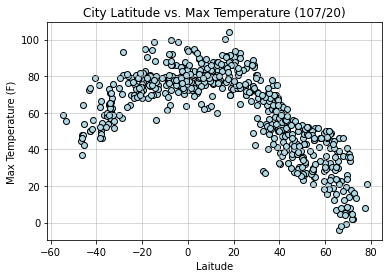

In [13]:

# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(city_clean_data["Lat"], city_clean_data["MaxTemp"], facecolor = "lightblue", edgecolor = "black")

# Set title/
plt.title("City Latitude vs. Max Temperature (107/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

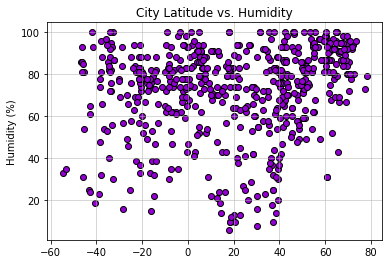

In [14]:
# Create Latitude vs. Humnidity Plot scatter plot
plt.scatter(city_clean_data["Lat"],city_clean_data["Humidity"], facecolor = "darkviolet", edgecolor = "black")

# Title/
plt.title("City Latitude vs. Humidity")

# Set xX.xlabel("Laitude")

# Y axis label
plt.ylabel("Humidity (%)")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save  as .pngs
plt.savefig("../City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

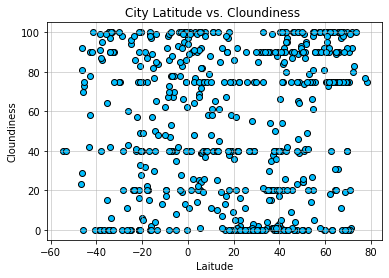

In [15]:
# Create Latitude vs. Cloundiness Plot scatter plot
plt.scatter(city_clean_data["Lat"], city_clean_data["Cloundiness"], facecolor = "deepskyblue", edgecolor = "black")

# Title/
plt.title("City Latitude vs. Cloundiness ")

#X axis label
plt.xlabel("Laitude")

# Y axis label
plt.ylabel("Cloundiness")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save  as .pngs
plt.savefig("../City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

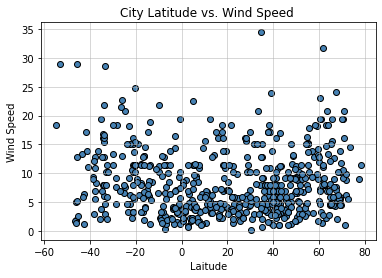

In [16]:
# Create Latitude vs. Wind Speed Plot scatter plot
plt.scatter(city_clean_data["Lat"], city_clean_data["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Title/
plt.title("City Latitude vs. Wind Speed ")

#X axis label
plt.xlabel("Laitude")

# Y axis label
plt.ylabel("Wind Speed")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save  as .pngs
plt.savefig("../City Latitude vs Wind.png")

## Linear Regression

In [17]:
#Define North and south
north = city_clean_data.loc[city_weather_df['Lat'] >= 0]
south = city_clean_data.loc[city_weather_df['Lat'] < 0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
# Perform a linear regression on temperature vs. latitude
x_values = north['MaxTemp']
y_values = north['Lat']
#city_clean_data.loc[:,("MaxTemp", 'Lat')]
# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
north['regress Temp'] = regress_values

north

-0.7634461435394161 79.95655652671846 -0.8694378114595985


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress Temp
0,Vardø,70.37,31.11,37.4,86,75,19.46,51.403671
3,Cayenne,4.93,-52.33,89.6,55,25,11.41,11.551782
5,Portland,45.52,-122.68,43.0,60,20,2.57,47.128372
6,Seminole,28.71,-81.21,86.0,70,75,10.29,14.300188
7,Fortuna,40.60,-124.16,57.0,42,1,6.93,36.440126
...,...,...,...,...,...,...,...,...
579,Harwich,51.94,1.28,52.0,74,49,8.01,40.257357
580,Beruwala,6.48,79.98,79.2,87,19,4.16,19.491622
582,Biltine,14.53,20.92,86.4,14,19,7.29,13.994810
583,Levelland,33.59,-102.38,27.0,92,90,20.80,59.343511


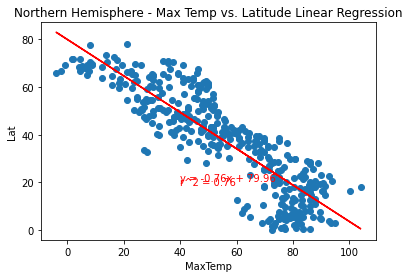

In [19]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('MaxTemp')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Northern - Max Temp Lat")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
# Perform a linear regression on temperature vs. latitude
#x_values = south['MaxTemp']
#y_values = south['Lat']
city_clean_data.loc[:, ('MaxTemp', 'Lat')]

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
south['regress temp'] = regress_values

south

-0.7634461435394161 79.95655652671846 -0.8694378114595985


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp
1,Ushuaia,-54.80,-68.30,59.00,33,40,18.34,NaN
2,Lebu,-37.62,-73.65,54.45,66,95,5.57,NaN
4,Atuona,-9.80,-139.03,79.32,72,17,21.83,NaN
8,Mataura,-46.19,168.86,37.20,93,29,1.86,NaN
14,Arraial do Cabo,-22.97,-42.03,78.80,69,20,9.17,NaN
...,...,...,...,...,...,...,...,...
571,Mackay,-21.15,149.20,69.80,94,75,5.82,NaN
574,Vanimo,-2.67,141.30,76.30,78,92,3.94,NaN
576,Plettenberg Bay,-34.05,23.37,65.34,81,42,16.58,NaN
578,Chibombo,-14.66,28.07,77.77,22,30,8.03,NaN


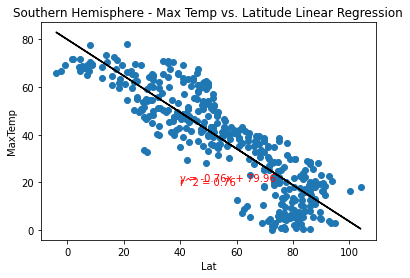

In [21]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='black')

plt.xlabel('Lat')
plt.ylabel('MaxTemp')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("South - Max Temp Lat")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [22]:
# Perform a linear regression on temperature vs. latitude
x_values = north['Humidity']
y_values = north['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
north['regress hum'] = regress_values

north

0.2246316877848873 21.100031118663523 0.23793543279804075


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress Temp,regress hum
0,Vardø,70.37,31.11,37.4,86,75,19.46,51.403671,40.418356
3,Cayenne,4.93,-52.33,89.6,55,25,11.41,11.551782,33.454774
5,Portland,45.52,-122.68,43.0,60,20,2.57,47.128372,34.577932
6,Seminole,28.71,-81.21,86.0,70,75,10.29,14.300188,36.824249
7,Fortuna,40.60,-124.16,57.0,42,1,6.93,36.440126,30.534562
...,...,...,...,...,...,...,...,...,...
579,Harwich,51.94,1.28,52.0,74,49,8.01,40.257357,37.722776
580,Beruwala,6.48,79.98,79.2,87,19,4.16,19.491622,40.642988
582,Biltine,14.53,20.92,86.4,14,19,7.29,13.994810,24.244875
583,Levelland,33.59,-102.38,27.0,92,90,20.80,59.343511,41.766146


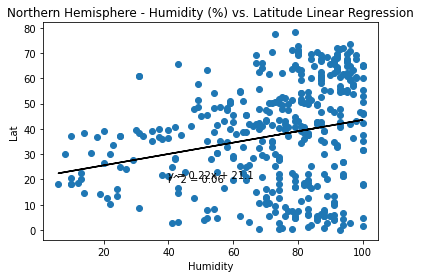

In [23]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='black')

plt.xlabel('Humidity')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='black')
plt.annotate(r_squared, (40, 19), color='black')
plt.savefig("Northern - Humitity Lat")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [24]:
# Perform a linear regression on temperature vs. latitude
x_values = south['Humidity']
y_values = south['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
south['regress hum'] = regress_values

south

0.05872566593493428 -24.707712117040813 0.08662896366825087


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress hum
1,Ushuaia,-54.80,-68.30,59.00,33,40,18.34,NaN,-22.769765
2,Lebu,-37.62,-73.65,54.45,66,95,5.57,NaN,-20.831818
4,Atuona,-9.80,-139.03,79.32,72,17,21.83,NaN,-20.479464
8,Mataura,-46.19,168.86,37.20,93,29,1.86,NaN,-19.246225
14,Arraial do Cabo,-22.97,-42.03,78.80,69,20,9.17,NaN,-20.655641
...,...,...,...,...,...,...,...,...,...
571,Mackay,-21.15,149.20,69.80,94,75,5.82,NaN,-19.187500
574,Vanimo,-2.67,141.30,76.30,78,92,3.94,NaN,-20.127110
576,Plettenberg Bay,-34.05,23.37,65.34,81,42,16.58,NaN,-19.950933
578,Chibombo,-14.66,28.07,77.77,22,30,8.03,NaN,-23.415747


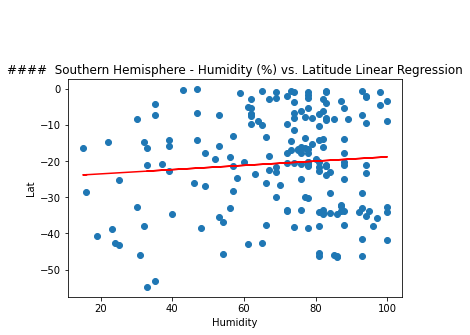

In [25]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Humidity')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("South - Humidity Lat")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [26]:
# Perform a linear regression on temperature vs. latitude
x_values = north['Cloundiness']
y_values = north['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
north['regress cloud'] = regress_values

north

0.09521537279867892 32.426247048378606 0.17155572082634035


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress Temp,regress hum,regress cloud
0,Vardø,70.37,31.11,37.4,86,75,19.46,51.403671,40.418356,39.567400
3,Cayenne,4.93,-52.33,89.6,55,25,11.41,11.551782,33.454774,34.806631
5,Portland,45.52,-122.68,43.0,60,20,2.57,47.128372,34.577932,34.330555
6,Seminole,28.71,-81.21,86.0,70,75,10.29,14.300188,36.824249,39.567400
7,Fortuna,40.60,-124.16,57.0,42,1,6.93,36.440126,30.534562,32.521462
...,...,...,...,...,...,...,...,...,...,...
579,Harwich,51.94,1.28,52.0,74,49,8.01,40.257357,37.722776,37.091800
580,Beruwala,6.48,79.98,79.2,87,19,4.16,19.491622,40.642988,34.235339
582,Biltine,14.53,20.92,86.4,14,19,7.29,13.994810,24.244875,34.235339
583,Levelland,33.59,-102.38,27.0,92,90,20.80,59.343511,41.766146,40.995631


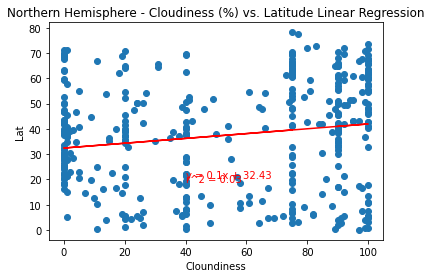

In [27]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Cloundiness')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Northern - Cloundiness Lat")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [28]:
x_values = south['Cloundiness']
y_values = south['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
south['regress scloud'] = regress_values

south

0.02514801528568757 -21.984280121692827 0.06659633882958123


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress hum,regress scloud
1,Ushuaia,-54.80,-68.30,59.00,33,40,18.34,NaN,-22.769765,-20.978360
2,Lebu,-37.62,-73.65,54.45,66,95,5.57,NaN,-20.831818,-19.595219
4,Atuona,-9.80,-139.03,79.32,72,17,21.83,NaN,-20.479464,-21.556764
8,Mataura,-46.19,168.86,37.20,93,29,1.86,NaN,-19.246225,-21.254988
14,Arraial do Cabo,-22.97,-42.03,78.80,69,20,9.17,NaN,-20.655641,-21.481320
...,...,...,...,...,...,...,...,...,...,...
571,Mackay,-21.15,149.20,69.80,94,75,5.82,NaN,-19.187500,-20.098179
574,Vanimo,-2.67,141.30,76.30,78,92,3.94,NaN,-20.127110,-19.670663
576,Plettenberg Bay,-34.05,23.37,65.34,81,42,16.58,NaN,-19.950933,-20.928063
578,Chibombo,-14.66,28.07,77.77,22,30,8.03,NaN,-23.415747,-21.229840


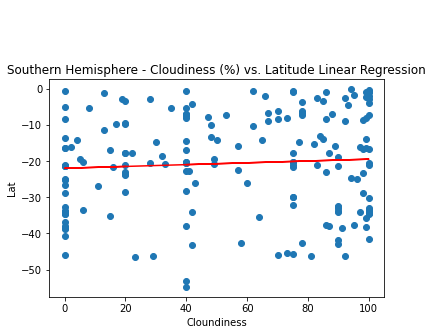

In [29]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Cloundiness')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("South - Cloundiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [30]:
# Perform a linear regression on temperature vs. latitude
x_values = north['Wind Speed']
y_values = north['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
north['regress wind'] = regress_values

south

0.8804616637733695 30.60974783562453 0.22320553514621044


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress hum,regress scloud
1,Ushuaia,-54.80,-68.30,59.00,33,40,18.34,NaN,-22.769765,-20.978360
2,Lebu,-37.62,-73.65,54.45,66,95,5.57,NaN,-20.831818,-19.595219
4,Atuona,-9.80,-139.03,79.32,72,17,21.83,NaN,-20.479464,-21.556764
8,Mataura,-46.19,168.86,37.20,93,29,1.86,NaN,-19.246225,-21.254988
14,Arraial do Cabo,-22.97,-42.03,78.80,69,20,9.17,NaN,-20.655641,-21.481320
...,...,...,...,...,...,...,...,...,...,...
571,Mackay,-21.15,149.20,69.80,94,75,5.82,NaN,-19.187500,-20.098179
574,Vanimo,-2.67,141.30,76.30,78,92,3.94,NaN,-20.127110,-19.670663
576,Plettenberg Bay,-34.05,23.37,65.34,81,42,16.58,NaN,-19.950933,-20.928063
578,Chibombo,-14.66,28.07,77.77,22,30,8.03,NaN,-23.415747,-21.229840


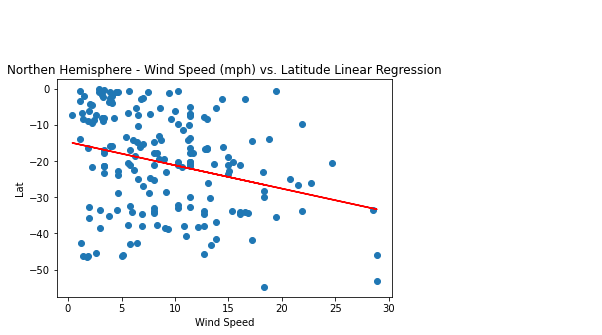

In [35]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Wind Speed')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Northen Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("North - Wind")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [33]:
# Perform a linear regression on temperature vs. latitude
x_values = south['Wind Speed']
y_values = south['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
south['regress wind'] = regress_values

south

-0.6448358608675793 -14.714266761987215 -0.28009656704531505


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress hum,regress scloud,regress wind
1,Ushuaia,-54.80,-68.30,59.00,33,40,18.34,NaN,-22.769765,-20.978360,-26.540556
2,Lebu,-37.62,-73.65,54.45,66,95,5.57,NaN,-20.831818,-19.595219,-18.306003
4,Atuona,-9.80,-139.03,79.32,72,17,21.83,NaN,-20.479464,-21.556764,-28.791034
8,Mataura,-46.19,168.86,37.20,93,29,1.86,NaN,-19.246225,-21.254988,-15.913661
14,Arraial do Cabo,-22.97,-42.03,78.80,69,20,9.17,NaN,-20.655641,-21.481320,-20.627412
...,...,...,...,...,...,...,...,...,...,...,...
571,Mackay,-21.15,149.20,69.80,94,75,5.82,NaN,-19.187500,-20.098179,-18.467211
574,Vanimo,-2.67,141.30,76.30,78,92,3.94,NaN,-20.127110,-19.670663,-17.254920
576,Plettenberg Bay,-34.05,23.37,65.34,81,42,16.58,NaN,-19.950933,-20.928063,-25.405645
578,Chibombo,-14.66,28.07,77.77,22,30,8.03,NaN,-23.415747,-21.229840,-19.892299


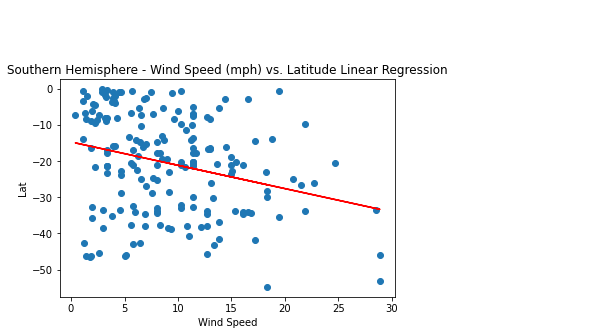

In [36]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Wind Speed')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("South - Wind")